In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params


set_option("display.max_columns",150)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pierredelice/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()

In [ ]:
df['nombre'].str.replace(r"^nan$",'',regex=True).value_counts()

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_2856/2212276675.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


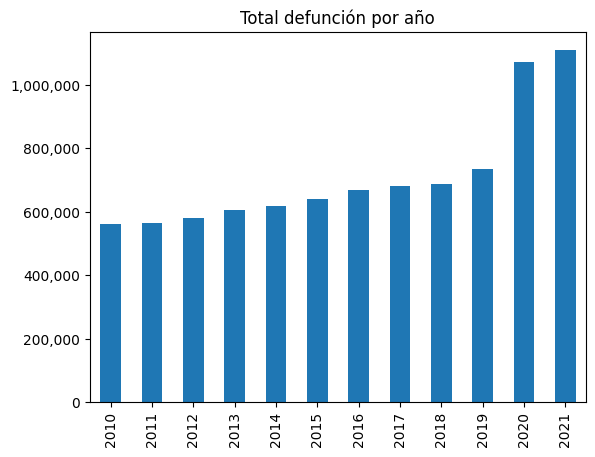

In [36]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar')
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show();